# 1. Write a Program for Implementing the Perceptron Learning Algorithm

In [1]:
import numpy as np

Perceptron classification accuracy 1.0


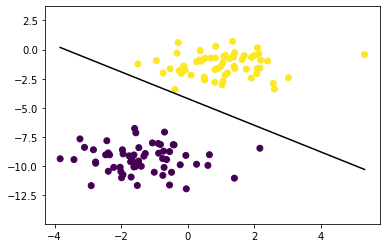

In [2]:

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

# 2. Write a Program for Implementing Backpropagation Learning Algorithm

In [3]:
import numpy as np
# X = (hours sleeping, hours studying), y = test score of the student
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) #maximum of X array
y = y/100 # maximum test score is 100

class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer
        
    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of weights (3x2)
        self.z2 = self.sigmoid(self.z) #activation function
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of weights (3x1)
        output = self.sigmoid(self.z3)
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        #backward propogate through the network
        self.output_error = y - output # error in output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z2_error = self.output_delta.dot(self.W2.T) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
        
        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input -> hidden) weights
        self.W2 += self.z2.T.dot(self.output_delta) # adjusting second set (hidden -> output) weights
        
    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)
        
NN = NeuralNetwork()

for i in range(1000): #trains the NN 1000 times
    if (i % 100 == 0):
        print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
    NN.train(X, y)
        
print("Input: " + str(X))
print("Actual Output: " + str(y))
print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
print("\n")
print("Predicted Output: " + str(NN.feedForward(X)))

Loss: 0.08514861344519009
Loss: 0.0005961323350581162
Loss: 0.0005602526243251103
Loss: 0.0005290733921215076
Loss: 0.0005009568081230519
Loss: 0.0004755364316943096
Loss: 0.00045249538391101937
Loss: 0.0004315590775905447
Loss: 0.00041248910716104326
Loss: 0.0003950780581609124
Input: [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: [[0.92]
 [0.86]
 [0.89]]
Loss: 0.0003791451009458664


Predicted Output: [[0.89372626]
 [0.87002938]
 [0.90861552]]


# 3 Write a Program for Implementing the Associative Memory

In [4]:
# Patterns
A = np.array([[1, 1, -1],
[-1, 1, 1],
[-1, -1, 1]])
# initalize weight matrix
W = np.zeros((3,3))
for row in A:
    Accuracy: 0.8
    W += row * row.reshape((-1, 1))
    print("Weight matrix: ")
print(W)
def recall(pattern):
    mul = []
    for row in W:
        m = pattern * row.T
        mul.append(m.sum())
    result = [-1 if i<0 else 1 for i in mul]
    return result
print("Recall Pattern: ")
print(recall([-1,-1,1]))
# test on noisy pattern
print("Recall Noisy Pattern: ")
print(recall([1,1,1]))

Weight matrix: 
Weight matrix: 
Weight matrix: 
[[ 3.  1. -3.]
 [ 1.  3. -1.]
 [-3. -1.  3.]]
Recall Pattern: 
[-1, -1, 1]
Recall Noisy Pattern: 
[1, 1, -1]


# 4 Write a Program for Implementing the Bi-directional Associative Memory

In [5]:
import math
import numpy as np

In [6]:
# Initializes the corellaction weights matrix W 
# as the inner dot product of X and Y pattern maps
def learn(x,y):
    return x.T.dot(y)

# Initializes the corellaction weights matrix W as
# the sum of outer Kronecker products of corresponding
# patterns x and y from the maps X,Y, respectively.
def learn_op(x,y):
    return np.sum([np.outer(x,y) for x,y in zip(x,y)],axis=0)

In [7]:
# Recalls an association Y for the input pattern X, bidirectionally:
def recall(w,x,d='out'):
    end_of_recall = False; \
        y_pred = None; x_eval = y_pred
    # Compute the BAM output until the existing inputs x
    # are not equal to the new inputs x_eval (x != x_eval)
    while end_of_recall == False:
        # Compute the output y_pred of all memory cells, activated
        # by the bipolar threshold function F(X): [ w^T*x - forward, w*x - backwards ]
        y_pred = activate(w.T.dot(x) \
            if d == 'out' else w.dot(x))
        # Compute the new inputs x_eval for the next iteration:
        # [ w*y - forward, w^T*y - backwards]
        x_eval = activate(w.dot(y_pred) \
            if d == 'out' else w.T.dot(y_pred))
        # Check if x and x_eval are not the same. 
        # If not, assign the new inputs x_eval to x
        x,end_of_recall = x_eval,np.all(np.equal(x,x_eval))

    return y_pred  # Return the output pattern Y, recalled from the BAM.

In [8]:
# Bipolar threshold activation function
def bipolar_th(x):
    return 1 if x >= 0 else -1
# Applies the bipolar_th(x) function to the sum 
# of weighted inputs of all BAM's memory cells.
def activate(x):
    return np.vectorize(bipolar_th)(x)

In [9]:
# The BAM model of 8*10^3 inputs, 5*10^3 memory cells, with memory capacity - 20 patterns

patterns = 20; neurons = 8000; mm_cells = 5500

# Generate input (X) and output (Y) patterns maps of shapes (patterns x neurons) and (patterns by mm_cells)
X = np.array([1 if x > 0.5 else -1 for x in np.random.rand(patterns*neurons)],dtype=np.int8)

# Orthogonalize the input patterns (X) into the corresponding output patterns (Y) 
Y = np.array(-X[:patterns*mm_cells],dtype=np.int8)

# Reshape patterns into the input and output 2D-pattern maps X and Y
X = np.reshape(X,(patterns,neurons))
Y = np.reshape(Y,(patterns,mm_cells))

# Learn the BAM model with the associations of the input and output patterns X and Y
W = learn_op(X,Y) # W - the correlation weights matrix (i.e., the BAM's memory storage space)

print("Recalling the associations (Y) for the input patterns (X):\n")

# Recall an association (Y) for each input (X) and target output (Y') patterns, from X,Y
for x,y in zip(X,Y):
    y_pred = recall(W,x,'out') # y_pred - the predicted pattern Y
    # Check if the target and predicted patterns (Y) are identical, and display the results
    print("x =",x,"target =",y,"y =",-y_pred," :",np.any(-y_pred != y))

print("\r\nRecalling the associations (X) for the output patterns (Y):\n")

# Recall an association (X) for each output (Y) and target input (X) patterns, from X,Y
for x,y in zip(X,Y):
    x_pred = recall(W,y,d='in') # x_pred - the predicted pattern X
    # Check if the target and predicted patterns (X) are identical, and display the results
    print("y =",y,"target =",x,"x =",-x_pred," :",np.any(-x_pred != x))

Recalling the associations (Y) for the input patterns (X):

x = [-1  1 -1 ... -1 -1 -1] target = [ 1 -1  1 ...  1  1  1] y = [-1  1 -1 ... -1 -1 -1]  : True
x = [ 1  1  1 ...  1 -1 -1] target = [-1 -1 -1 ...  1 -1  1] y = [ 1  1  1 ... -1  1 -1]  : True
x = [ 1  1 -1 ... -1  1  1] target = [-1  1 -1 ...  1 -1 -1] y = [ 1 -1  1 ... -1  1  1]  : True
x = [-1 -1 -1 ...  1 -1 -1] target = [-1 -1 -1 ... -1 -1  1] y = [ 1  1  1 ...  1  1 -1]  : True
x = [ 1  1 -1 ...  1  1 -1] target = [-1  1  1 ... -1 -1  1] y = [ 1 -1 -1 ...  1  1 -1]  : True
x = [ 1 -1 -1 ...  1 -1  1] target = [ 1 -1  1 ... -1  1  1] y = [-1  1 -1 ...  1 -1 -1]  : True
x = [ 1 -1 -1 ... -1 -1  1] target = [-1  1 -1 ...  1 -1 -1] y = [ 1 -1  1 ... -1  1  1]  : True
x = [ 1  1 -1 ... -1 -1  1] target = [ 1  1 -1 ...  1 -1  1] y = [-1 -1  1 ... -1  1 -1]  : True
x = [-1  1  1 ...  1  1  1] target = [-1 -1 -1 ...  1  1  1] y = [ 1  1  1 ... -1 -1 -1]  : True
x = [ 1  1 -1 ... -1  1  1] target = [ 1  1  1 ...  1  1 -1] y = [-

In [10]:
# Distorts an input pattern map X
def poison(x,ratio=0.33,distort='yes'):
    p_fn = [ lambda x: 0 if np.random.rand() > 0.5 else x,
             lambda x: 1 if np.random.rand() > 0.5 else -1, ]

    x_shape = np.shape(x); x = np.reshape(x,-1)
    return np.reshape(np.vectorize(p_fn[distort == 'yes'])(x),x_shape)

# Predicting a randomly distorted pattern

# Select a pattern from X, randomly
pattern_n = np.random.randint(0,np.size(X,axis=0))

# Distort the input pattern with random 1's or -1's
x_dist = poison(X[pattern_n],distort='yes')

# Predict a correct association for the random pattern X
y_pred = recall(W,x_dist)

# Display the results
print("Output:\r\n")
print("x =",x,"target =",y,"y =",y_pred,":",np.any(y[pattern_n] != y_pred),"\r\n")

Output:

x = [1 1 1 ... 1 1 1] target = [ 1 -1  1 ... -1  1 -1] y = [-1 -1 -1 ... -1 -1  1] : True 



# 5 Write a Program for Implementing Self Organizing Map Algorithm

In [13]:
!pip install minisom
from minisom import MiniSom  

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [14]:
df=pd.read_csv(r"C:\Users\bablu\Downloads\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
plt.style.use('fivethirtyeight')

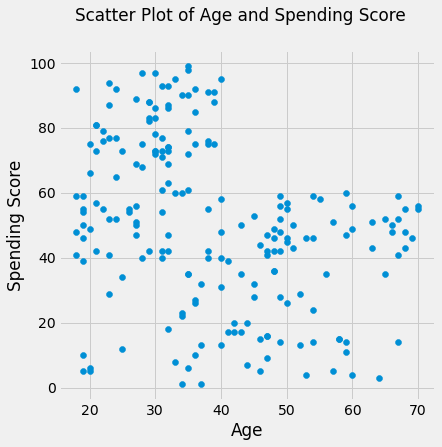

In [16]:
age = df['Age'].tolist()
spending_score = df['Spending Score (1-100)'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(age, spending_score)
plt.suptitle("Scatter Plot of Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

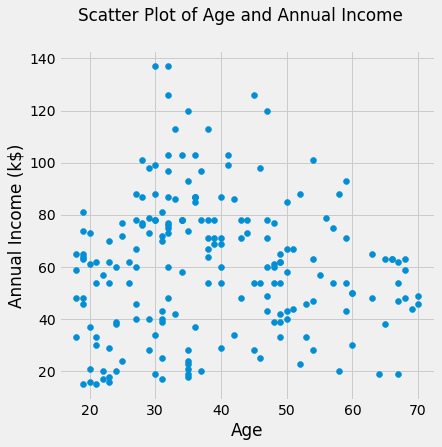

In [17]:
age = df['Age'].tolist()
annual_income = df['Annual Income (k$)'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(age, annual_income)
plt.suptitle("Scatter Plot of Age and Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

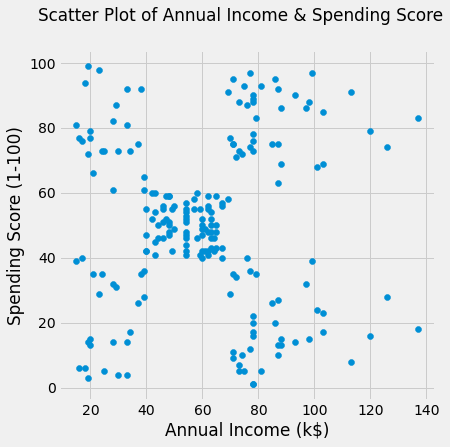

In [18]:
annual_income = df['Annual Income (k$)'].tolist()
spending_score = df['Spending Score (1-100)'].tolist()
fig = plt.figure(figsize=(6,6))
plt.scatter(annual_income, spending_score)
plt.suptitle("Scatter Plot of Annual Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Transform features to list
data = features.values
data.shape

(200, 2)

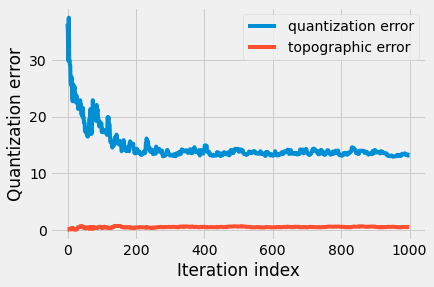

In [21]:
# I use linear som topography
som_shape = (1, 5)

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()


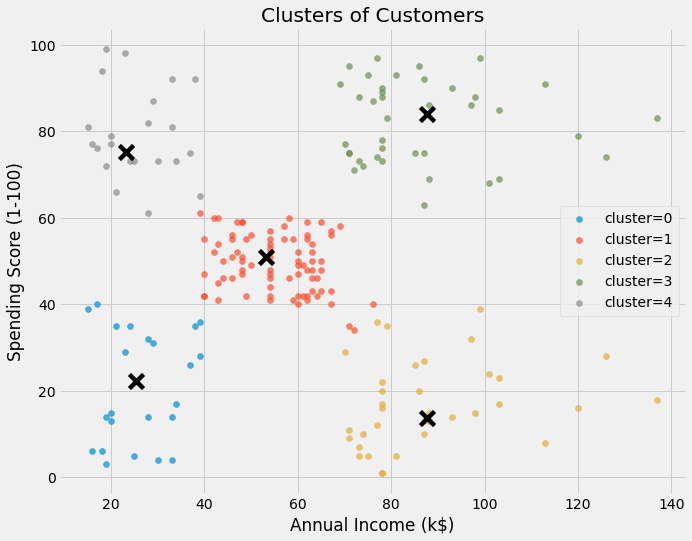

In [22]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend();

# 6	Write a Program for Implementing Adaptive Resonance Theory Algorithm

In [23]:
import numpy as np 
VIGILANCE = 0.6  # trashhold  0 - 1.0
LEARNING_COEF = 0.5  # standard 
train = np.array([[1,0,0,0,0,0],
                  [1,1,1,1,1,0],
                  [1,0,1,0,1,0],
                  [0,1,0,0,1,1],
                  [1,1,1,0,0,0],
                  [0,0,1,1,1,0],
                  [1,1,1,1,1,0],
                  [1,1,1,1,1,1]], np.float)

test = np.array([[1,1,1,1,1,1],
                 [1,1,1,1,1,0],
                 [1,1,1,1,0,0],
                 [1,1,1,0,0,0],
                 [1,1,0,0,0,0],
                 [1,0,0,0,0,0],
                 [0,0,0,0,0,0]], np.float)

L1_neurons_cnt = len(train[0])
L2_neurons_cnt = 1
# Init weights from the first neuron 
bottomUps = np.array([[1/(L1_neurons_cnt + 1) for _ in range(L1_neurons_cnt)]], np.float)
topDowns = np.array([[1 for _ in range(L1_neurons_cnt)]], np.float)

for tv in train: 
    print("-------")
    print('Train vector:', tv)
    createNewNeuron = True
    outputs = [bottomUps[i].dot(tv) for i in range(L2_neurons_cnt)]
    counter = L2_neurons_cnt
    while counter > 0:
        winning_output = max(outputs)
        winner_neuron_idx = outputs.index(winning_output)
        # NOTE!!! Sometimes there can be more than one winning neurons
        # Then we should select them randomly. For sake of simplicity,
        # this was not implemented for sake of simplicity 
        
        # Because `sum(tv)` can be 0 and we can not divide by zero :(
        tv_sum = sum(tv)
        if tv_sum == 0:
            similarity = 0 
        else:
            similarity = topDowns[winner_neuron_idx].dot(tv)/(sum(tv))
        print(" ", topDowns[winner_neuron_idx])
        print("    Bottom Ups Weights:", bottomUps[winner_neuron_idx])
        print("    Similartiy:", similarity)
        if similarity >= VIGILANCE:
            # Found similar neuron -> update their weights 
            createNewNeuron = False
            new_bottom_weights = tv * topDowns[winner_neuron_idx]/(LEARNING_COEF+tv.dot(topDowns[winner_neuron_idx]))
            new_top_weights = tv * topDowns[winner_neuron_idx]
            topDowns[winner_neuron_idx] = new_top_weights
            bottomUps[winner_neuron_idx] = new_bottom_weights
            break
        else:
            # Didn't find similar neuron
            outputs[winner_neuron_idx] = -1  # So it won't be selected in the next iteration
            counter -= 1
            
    if createNewNeuron:
        print("  Creating a new new neuron")
        new_bottom_weights = np.array([[i/(LEARNING_COEF + sum(tv)) for i in tv]], np.float)
        new_top_weights = np.array([[i for i in tv]], np.float)
        print("    Weights bottomUps:", new_bottom_weights)
        print("    Weights topDowns:", new_top_weights)
        bottomUps = np.append(bottomUps, new_bottom_weights, axis=0)
        topDowns = np.append(topDowns, new_top_weights, axis=0)
        L2_neurons_cnt += 1
    
print("=====")
print(f"Total Classes: {L2_neurons_cnt}")
print("Center of masses")
print(topDowns)
for tv in test:
    A = list(range(L2_neurons_cnt))
    createNewNeuron = True
    outputs = [bottomUps[i].dot(tv) for i in A]
    winning_weight = max(outputs)
    winner_neuron_idx = outputs.index(winning_weight)
    print(f"Class {winner_neuron_idx} for train vector {tv}")

-------
Train vector: [1. 0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1. 1.]
    Bottom Ups Weights: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714]
    Similartiy: 1.0
-------
Train vector: [1. 1. 1. 1. 1. 0.]
  [1. 0. 0. 0. 0. 0.]
    Bottom Ups Weights: [0.66666667 0.         0.         0.         0.         0.        ]
    Similartiy: 0.2
  Creating a new new neuron
    Weights bottomUps: [[0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.        ]]
    Weights topDowns: [[1. 1. 1. 1. 1. 0.]]
-------
Train vector: [1. 0. 1. 0. 1. 0.]
  [1. 0. 0. 0. 0. 0.]
    Bottom Ups Weights: [0.66666667 0.         0.         0.         0.         0.        ]
    Similartiy: 0.3333333333333333
  [1. 1. 1. 1. 1. 0.]
    Bottom Ups Weights: [0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.        ]
    Similartiy: 1.0
-------
Train vector: [0. 1. 0. 0. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
    Bottom Ups Weights: [0.28571429 0.         0.28571429 0.         0.28571429 0.        ]
  

C:\Users\bablu\AppData\Local\Temp\ipykernel_17492\4071264396.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [1,1,1,1,1,1]], np.float)
C:\Users\bablu\AppData\Local\Temp\ipykernel_17492\4071264396.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [0,0,0,0,0,0]], np.float)
C:\Users\bablu\AppData\Local\Temp\ipykernel_17492\4071264396

# 7 Write a Program for Implementing Learning Vector Quantization Algorithm

In [24]:
import numpy as np
import pandas as pd

from random import seed
from random import randrange
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [25]:
df=pd.read_csv(r"C:\Users\bablu\Downloads\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
features = df.drop('Type', axis=1)
labels = df['Type'].values
labels = labels.reshape(len(labels), 1)

In [27]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [28]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [29]:
dataset = np.append(features, labels, axis=1).tolist()

In [30]:
def kfold(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
        
    return dataset_split

In [31]:
n_folds = 5

folds = kfold(dataset, n_folds)

In [32]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [33]:
def random_subset(train):
    n_records = len(train)
    n_features = len(train[0])
    subsets = [train[randrange(n_records)][i] for i in range(n_features)]
    return subsets

In [34]:
def best_match(subsets, test_row):
    distances = list()
    
    for subset in subsets:
        dist = euclidean_distance(subset, test_row)
        distances.append((subset, dist))
        
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]

In [35]:
def lvq(train_set, n_subsets, lrate, epochs):
    subsets = [random_subset(train_set) for i in range(n_subsets)]

    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        
        for row in train_set:
            bmu = best_match(subsets, row)
            
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                if bmu[-1] == row[-1]:
                    bmu[i] += rate * error
                else:
                    bmu[i] -= rate * error
                    
    return subsets

In [36]:
def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [37]:
def train_test_split(folds, fold):
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()
    return train_set, test_set
lrate = 0.1
epochs = 500
n_subsets = 50


scores = list()

for fold in folds:
    train_set, test_set = train_test_split(folds, fold)

    for row in fold:
        test_set.append(list(row))

    subsets = lvq(train_set, n_subsets, lrate, epochs)
    y_hat = list()
    
    for test_row in test_set:
        output = best_match(subsets, test_row)[-1]
        y_hat.append(output)
    
    y = [row[-1] for row in fold]
    scores.append(accuracy(y, y_hat))
    
    
    
    
    print('Accuracy per fold: {:}'.format(scores))
print('Max Accuracy: {:.3f}'.format(max(scores)))

Accuracy per fold: [57.14285714285714]
Accuracy per fold: [57.14285714285714, 52.38095238095239]
Accuracy per fold: [57.14285714285714, 52.38095238095239, 66.66666666666666]
Accuracy per fold: [57.14285714285714, 52.38095238095239, 66.66666666666666, 59.523809523809526]
Accuracy per fold: [57.14285714285714, 52.38095238095239, 66.66666666666666, 59.523809523809526, 57.14285714285714]
Max Accuracy: 66.667


# 8	Write a Program for Implementing Convolutional Neural Networks

In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [39]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 1179s 7us/step


(50000, 32, 32, 3)

In [40]:
X_test.shape

(10000, 32, 32, 3)

In [41]:
y_train.shape

(50000, 1)

In [42]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [43]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [44]:
y_test = y_test.reshape(-1,)

In [45]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [46]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


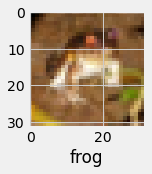

In [47]:
plot_sample(X_train, y_train, 0)

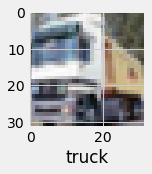

In [48]:
plot_sample(X_train, y_train, 1)

In [49]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [50]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [51]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 34ms/step - loss: 1.5102 - accuracy: 0.4557
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1258 - accuracy: 0.6052
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9899 - accuracy: 0.6575
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9097 - accuracy: 0.6832
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8470 - accuracy: 0.7071
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7966 - accuracy: 0.7237
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7453 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7016 - accuracy: 0.7569
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6647 - accuracy: 0.7677
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [53]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9270 - accuracy: 0.6963


[0.9270166158676147, 0.6963000297546387]

In [54]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 14ms/step


array([[3.2845795e-02, 1.3611029e-03, 7.3878975e-03, 5.3853488e-01,
        4.8594837e-04, 4.5381792e-02, 2.1316186e-02, 1.2949351e-05,
        3.3896053e-01, 1.3712922e-02],
       [4.3500671e-03, 2.5781924e-02, 1.2587486e-05, 7.0513266e-07,
        3.2357701e-07, 7.7724053e-08, 3.0321334e-07, 5.3793457e-07,
        9.6978509e-01, 6.8473368e-05],
       [4.7416698e-02, 1.5590483e-01, 2.5172085e-03, 2.5801593e-03,
        9.8852592e-04, 3.5350898e-04, 2.7550504e-04, 8.1987400e-04,
        7.8757501e-01, 1.5686536e-03],
       [9.4387269e-01, 1.6217722e-02, 3.0978201e-02, 1.6071930e-04,
        1.4826567e-03, 4.1555613e-05, 6.1880786e-04, 4.7137830e-05,
        6.5590204e-03, 2.1455762e-05],
       [5.5984150e-05, 4.9552640e-05, 1.2845236e-02, 2.0955997e-02,
        6.1052543e-01, 1.7196035e-02, 3.3831000e-01, 3.7598995e-05,
        1.7476004e-05, 6.6995658e-06]], dtype=float32)

In [55]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [56]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

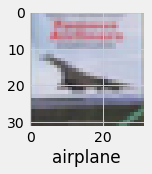

In [57]:
plot_sample(X_test, y_test,3)

In [58]:
classes[y_classes[3]]


'airplane'

In [59]:
classes[y_classes[3]]

'airplane'